In [1]:
#import the necessary libraries for data cleaning and visitualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#download the data
df=pd.read_csv(r"D:\My projects\Loan Approval analysis\Loan approval.csv")

In [3]:
#Check the data for first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#check the data shape
print(f'Data consist:\n Total Number of rows: {df.shape[0]}\n Total Number of Columns: {df.shape[1]}')

Data consist:
 Total Number of rows: 614
 Total Number of Columns: 13


In [5]:
#check the data types
print(f'Data types\n',"-"*100)
print(df.info())

Data types
 ----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

In [6]:
#Check the null values in the data
print(f'% of missing values in the data:\n{"-"*100}\n{round(df.isnull().sum()/df.shape[0]*100),3}')

% of missing values in the data:
----------------------------------------------------------------------------------------------------
(Loan_ID              0.0
Gender               2.0
Married              0.0
Dependents           2.0
Education            0.0
Self_Employed        5.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           4.0
Loan_Amount_Term     2.0
Credit_History       8.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64, 3)


In [7]:
#Lets check the values of all the data
val_data=df.columns.tolist()
for col in val_data:
    print(df[col].value_counts())
    print("-"*100)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
----------------------------------------------------------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
----------------------------------------------------------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------------------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int6

In [8]:
#lets check the statsitcal matrix
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
#lets fill the Nan values with some statistical treatment, some data type with object and numerical columns.
#categorical missing variables -- Gender,Dependents,Self_Employed
#Numerical missing variables -- LoanAmount,Loan_Amount_term,Credit_History
df['Gender'].fillna(df['Gender'].value_counts().idxmax(),inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(),inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(),inplace=True)
df['Married'].fillna(df['Married'].value_counts().idxmax(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [10]:
#Check the null values in the data
print(f'% of missing values in the data:\n{"-"*100}\n{round(df.isnull().sum()/df.shape[0]*100),3}')

% of missing values in the data:
----------------------------------------------------------------------------------------------------
(Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64, 3)


# Exploratory  data analysis

In [11]:
#First select the objects columns
obj_col=df.select_dtypes(include='object').columns
obj_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

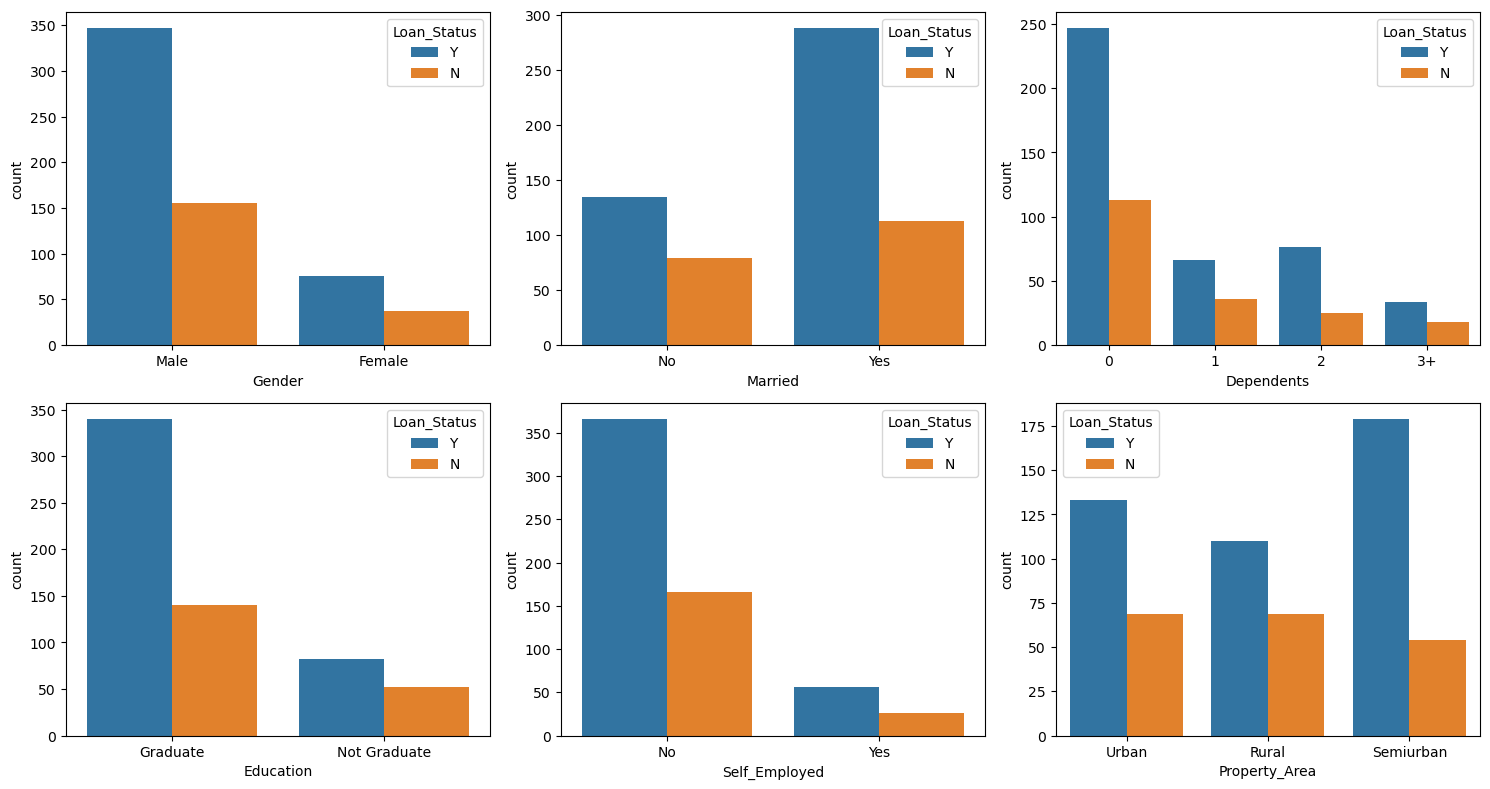

In [12]:
#chek the distribution of the data with comprision of loan approval status
obj_col1=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(15,8))
axs=axs.flatten()

for i,var in enumerate(obj_col1):
    sns.countplot(data=df,x=var,hue='Loan_Status',ax=axs[i])
plt.tight_layout()
plt.show()

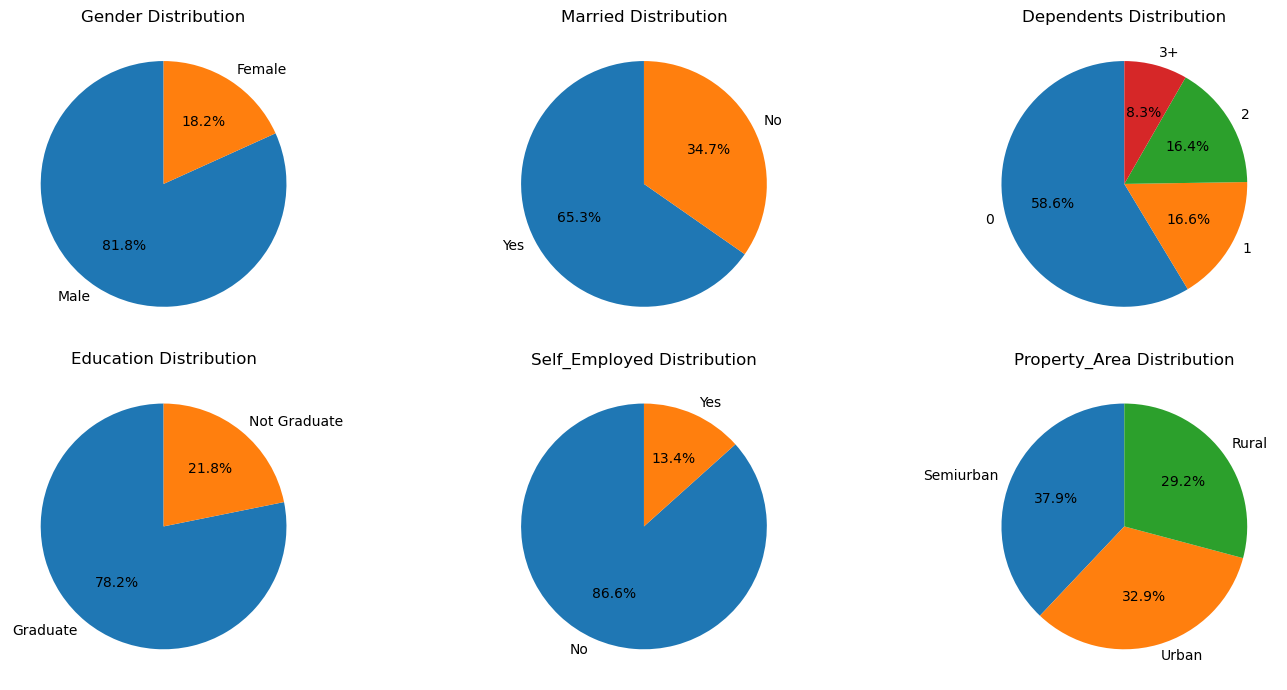

In [13]:
#Ditribution of the categorical values
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(15,7))

for i,var in enumerate(obj_col1):
    if i<len(axs.flat):
        obj_count=df[var].value_counts()
        axs.flat[i].pie(obj_count,labels=obj_count.index,autopct="%1.1f%%",startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
plt.tight_layout()
plt.show()

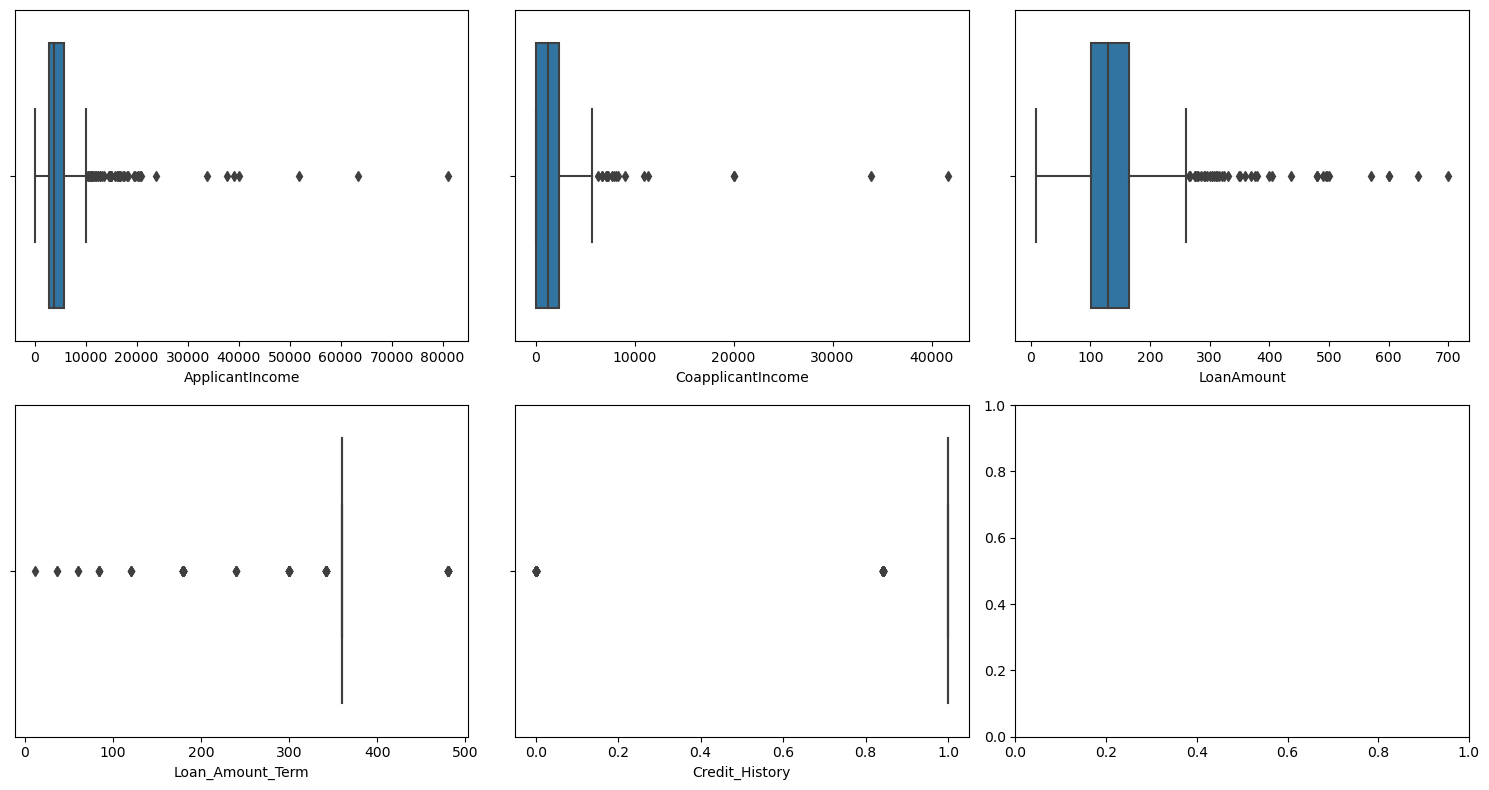

In [14]:
num=df.select_dtypes(include=['int64','float']).columns
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(15,8))
axs=axs.flatten()
for i,var in enumerate(num):
    sns.boxplot(x=var,data=df,ax=axs[i])
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2532\3541613164.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),cmap='CMRmap',annot=True);


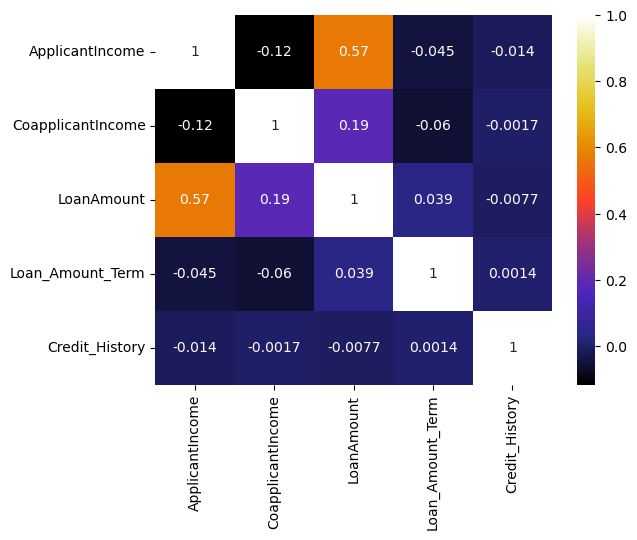

In [15]:
#Correlation matrix
sns.heatmap(data=df.corr(),cmap='CMRmap',annot=True);

# Statistical testing 

In [16]:
#will devide the data categorical section and numerical section to do the statistical testing
#for categorical variable will use the chi_square test and numerical column will use the Anova test
#import the necesary libraries for chi_square test
import colorama
from colorama import Fore
from scipy.stats import chi2_contingency
import stat

In [17]:
obj=df.select_dtypes(include='object').columns
obj

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Gender:


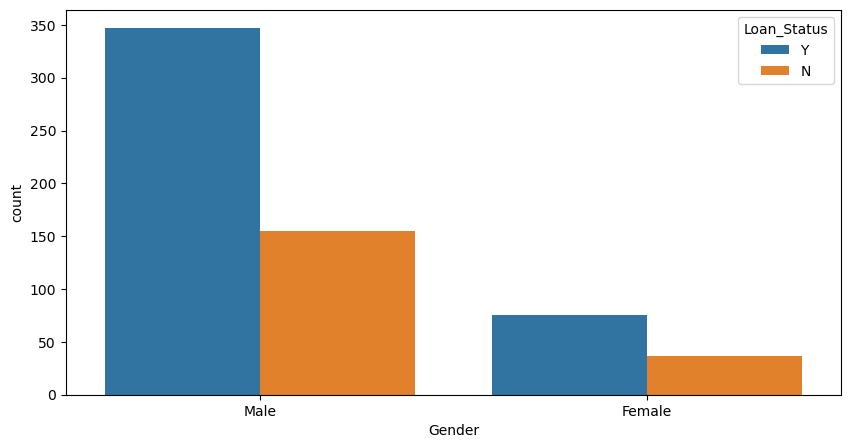

'Gender'is Bad predictor'

p_val=0.6558195040543224

Married:


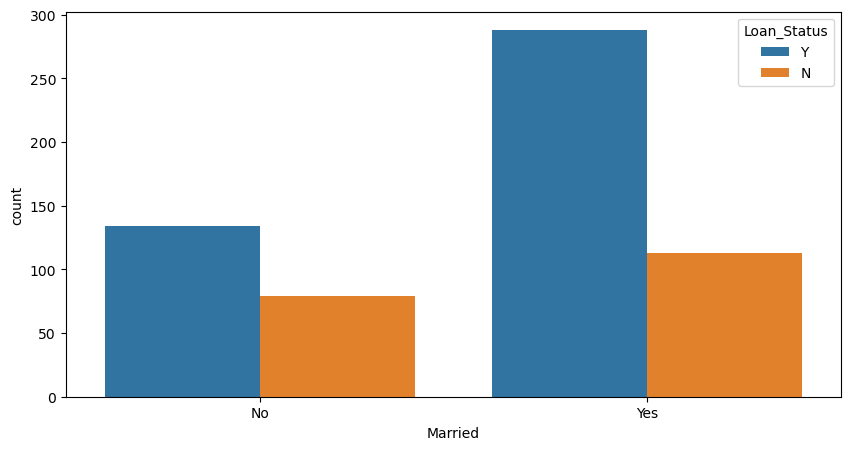

'Married'is'Good predictor'

p_val=0.02340665377837621

Dependents:


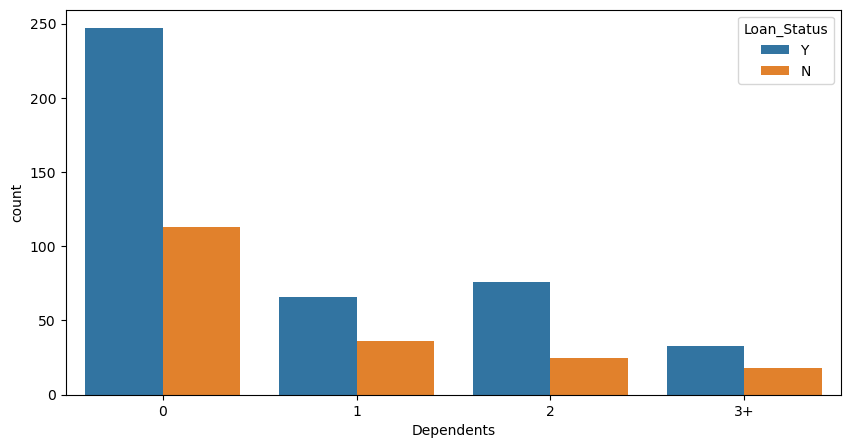

'Dependents'is Bad predictor'

p_val=0.3688663081366005

Education:


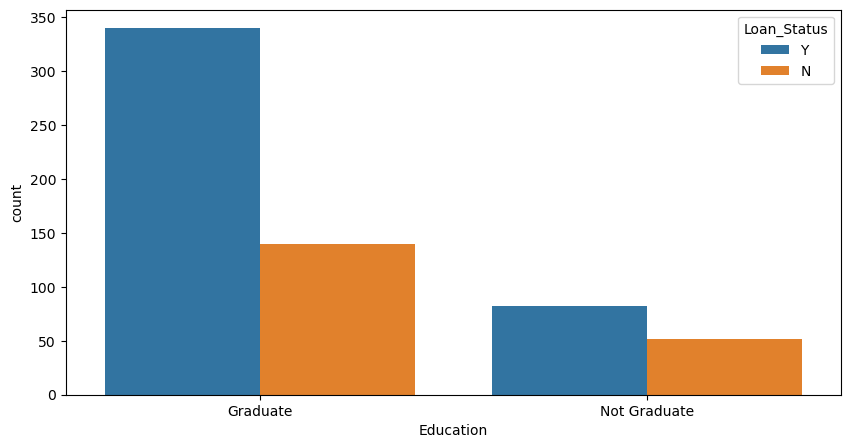

'Education'is'Good predictor'

p_val=0.03332717442347583

Self_Employed:


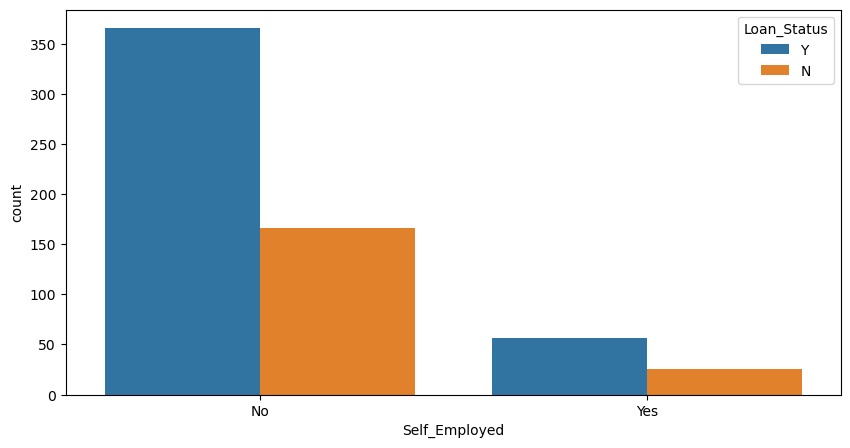

'Self_Employed'is Bad predictor'

p_val=0.9269417742799947

Property_Area:


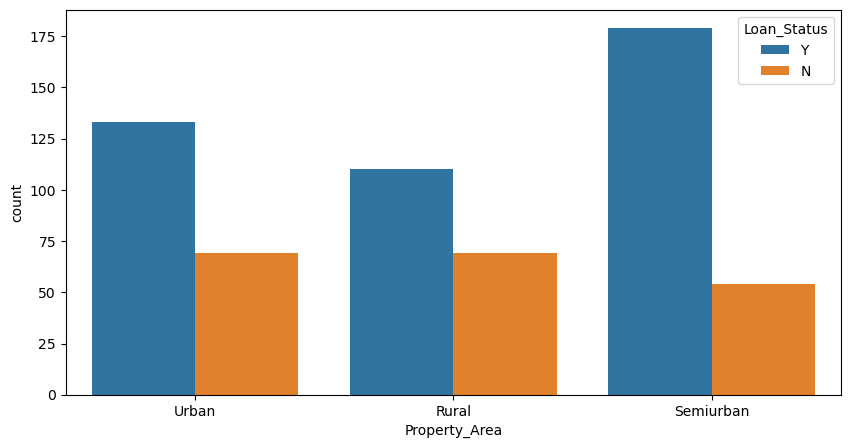

'Property_Area'is'Good predictor'

p_val=0.0021360187811644915



In [18]:
obj1=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

for i in obj1:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=i,hue='Loan_Status')
    plt.show()
    a=np.array(pd.crosstab(df['Loan_Status'],df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p>0.05:
        print(Fore.RED + "'{}'is Bad predictor'\n".format(i))
        print("p_val={}\n".format(p))
    else:
        print(Fore.GREEN + "'{}'is'Good predictor'\n".format(i))
        print("p_val={}\n".format(p))

In [19]:
#Lets select the numerical for Anova test
#Lets import the necessary stats library
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf
num=df.select_dtypes(include=['int64','float']).columns
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [20]:
for i in num:
    print("-"*100)
    print(i +":\n")
    print('Anova:\n')
    mod=ols(i+'~Loan_Status',data=df).fit()
    aov_table=smf.stats.anova_lm(mod,type=2)
    print(aov_table,'\n')
    print('p_value={}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]
    
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'\n".format(i))
        print('Avg of this feature is same for both card approved group and not approved group\n')
        print("p_val = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.RED +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both card approved group and not approved group\n')
        print('we need to perform Tuckey as atleast one category is different\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.Loan_Status,alpha=0.05)
        print(tukey,'\n')

----------------------------------------------------------------------------------------------------
ApplicantIncome:

Anova:

                df        sum_sq       mean_sq         F    PR(>F)
Loan_Status    1.0  5.074116e+05  5.074116e+05  0.013574  0.907288
Residual     612.0  2.287689e+10  3.738054e+07       NaN       NaN 

p_value=0.907287812130378

'ApplicantIncome' is a 'bad Predictor'

Avg of this feature is same for both card approved group and not approved group

p_val = 0.907287812130378

----------------------------------------------------------------------------------------------------
CoapplicantIncome:

Anova:

                df        sum_sq       mean_sq         F    PR(>F)
Loan_Status    1.0  1.838824e+07  1.838824e+07  2.151457  0.142948
Residual     612.0  5.230688e+09  8.546875e+06       NaN       NaN 

p_value=0.1429482868428829

'CoapplicantIncome' is a 'bad Predictor'

Avg of this feature is same for both card approved group and not approved group

p_val = 0.14

# Data preprocessing

In [21]:
#Lets select the nominal columns of gender
df1=pd.get_dummies(df,columns=['Gender'])
df1

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,1,0
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0,1
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0,1
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0,1


In [22]:
#Loan_status we need to convert to binary form 1,0
mp={"Y":1,"N":0}
df1['Loan_Status']=df1['Loan_Status'].map(mp)
df1

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1,1,0
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1,0,1
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1,0,1
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1,0,1


In [23]:
#lets select the remaining categorical varible for label encoding
from sklearn.preprocessing import LabelEncoder

re=['Married','Dependents','Education','Self_Employed','Property_Area']

for col in re:
    print("-"*50)
    print(f'before label encoding\n{col}:{df1[col].unique()}')  
    label_enc=LabelEncoder()
    label_enc.fit(df1[col].unique())
    df1[col]=label_enc.transform(df1[col])
    print(f'after label encoding\n{col}:{df1[col].unique()}')

--------------------------------------------------
before label encoding
Married:['No' 'Yes']
after label encoding
Married:[0 1]
--------------------------------------------------
before label encoding
Dependents:['0' '1' '2' '3+']
after label encoding
Dependents:[0 1 2 3]
--------------------------------------------------
before label encoding
Education:['Graduate' 'Not Graduate']
after label encoding
Education:[0 1]
--------------------------------------------------
before label encoding
Self_Employed:['No' 'Yes']
after label encoding
Self_Employed:[0 1]
--------------------------------------------------
before label encoding
Property_Area:['Urban' 'Rural' 'Semiurban']
after label encoding
Property_Area:[2 0 1]


C:\Users\Admin\AppData\Local\Temp\ipykernel_2532\2231719121.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df1.corr(),cmap='PRGn',annot=True);


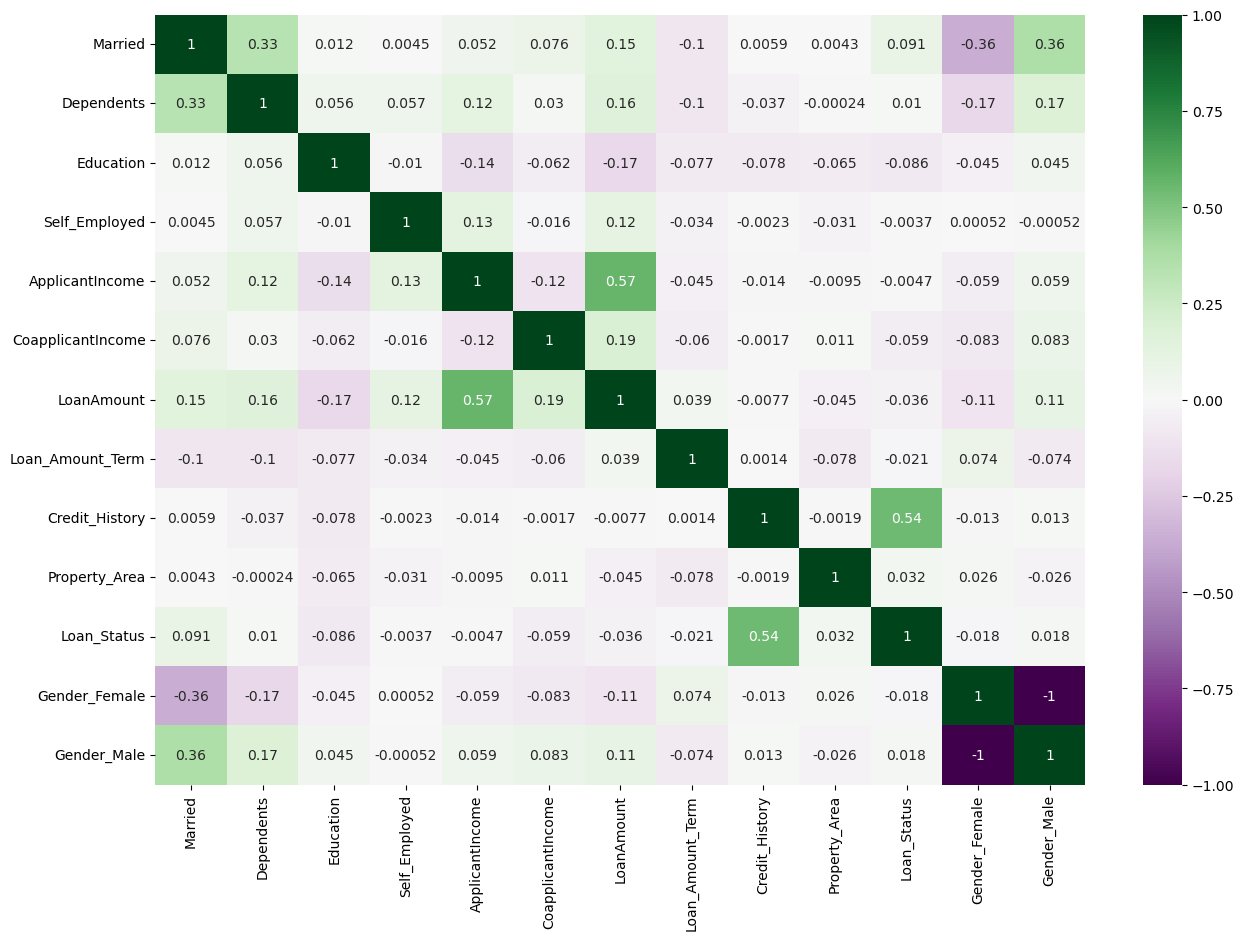

In [24]:
#now again check the correlation of all the veriables
plt.figure(figsize=(15,10))
sns.heatmap(data=df1.corr(),cmap='PRGn',annot=True);

In [46]:
#lets split the data for train and test
x=df1.drop(['Loan_ID','Loan_Status'],axis=1)
y=df1['Loan_Status']
print(x.shape)
print(y.shape)
x

(614, 12)
(614,)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,1
2,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,0,1
3,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,0,1
4,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,0
610,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,0,1
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,0,1
612,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,0,1


# Scaling of the train data

In [47]:
#Independent varibales we have dicret value and continus value, lets normalise the data
from sklearn.preprocessing import StandardScaler

In [48]:
std=StandardScaler()
X=std.fit_transform(x)

In [77]:
x1=pd.DataFrame(X,columns=x.columns)

In [79]:
#import the train_test_split packages
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

In [80]:
#lets import the necessary libraries for train and test the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [81]:
dtree=DecisionTreeClassifier(random_state=42)
parm={'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],  # You can set a range of values to explore
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
n_iter_search = 10

random_search = RandomizedSearchCV(
    dtree, param_distributions=parm, n_iter=n_iter_search, cv=5, random_state=42
)

random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [82]:
print("Best Hyperparameters found:")
print(random_search.best_params_)
print("Best Score found:")
print(random_search.best_score_)

Best Hyperparameters found:
{'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'entropy'}
Best Score found:
0.7697588126159556


In [83]:
#lets train the model using above parameter
d_tree=DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=1,max_depth=50)
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50, min_samples_split=10)

In [84]:
#lets predict using trainned model with accuracy rate
y_prd=d_tree.predict(x_test)
print(f'Model accuracy sore:{round(accuracy_score(y_test,y_prd)*100,2)}',"%")

Model accuracy sore:69.11 %


In [85]:
#Check the accuracy score and log loss
from sklearn.metrics import f1_score,precision_score,recall_score,log_loss
print(f'fl_score :',round((f1_score(y_test,y_prd,average='micro')),2))
print(f'Precision_score :',round((precision_score(y_test,y_prd,average='micro')),2))
print(f'Recall_score :',round((recall_score(y_test,y_prd,average='micro')),2))
print(f'Log_loss :',round((log_loss(y_test,y_prd)),2))

fl_score : 0.69
Precision_score : 0.69
Recall_score : 0.69
Log_loss : 11.14


In [88]:
#Features importance
im_ft=pd.DataFrame({"Feature_names":x_train.columns,"Features_importance":d_tree.feature_importances_})
fe=im_ft.sort_values(by='Features_importance',ascending=False)

,Feature_names,Features_importance
8,Credit_History,0.451044
4,ApplicantIncome,0.177087
6,LoanAmount,0.130785
5,CoapplicantIncome,0.085645
7,Loan_Amount_Term,0.060388
9,Property_Area,0.033935
1,Dependents,0.027103
2,Education,0.016542
3,Self_Employed,0.009971
11,Gender_Male,0.003332


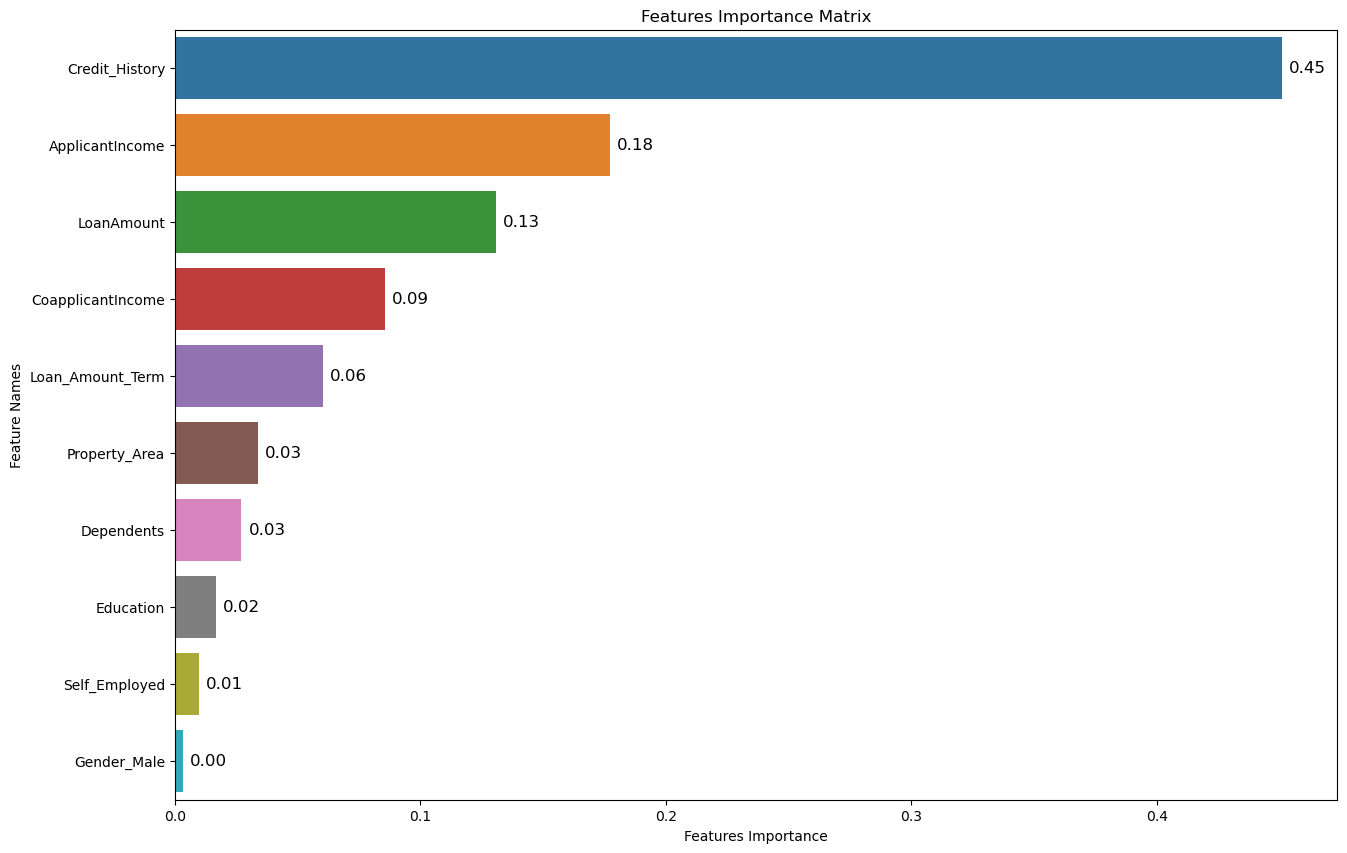

In [89]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=im_fe, x="Features_importance", y="Feature_names")

# Add data labels to the bar chart
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # offset text position slightly to the right
                textcoords="offset points",
                ha='left', va='center', fontsize=12, color='black')

plt.title('Features Importance Matrix')
plt.xlabel('Features Importance')
plt.ylabel('Feature Names')
plt.show()

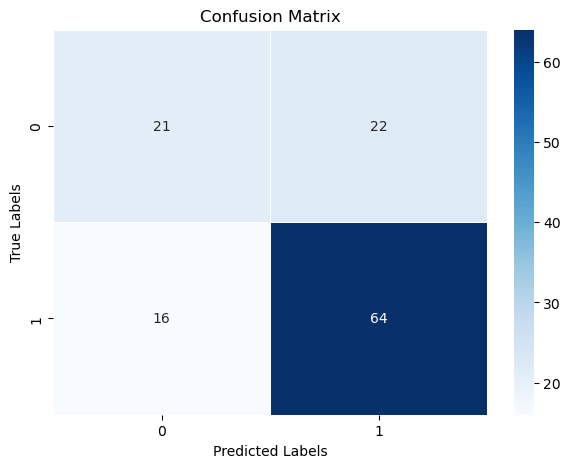

In [90]:
#lets plot the confusion matrix
cm=confusion_matrix(y_test,y_prd)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,annot=True,cmap="Blues",linewidths=0.5,fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

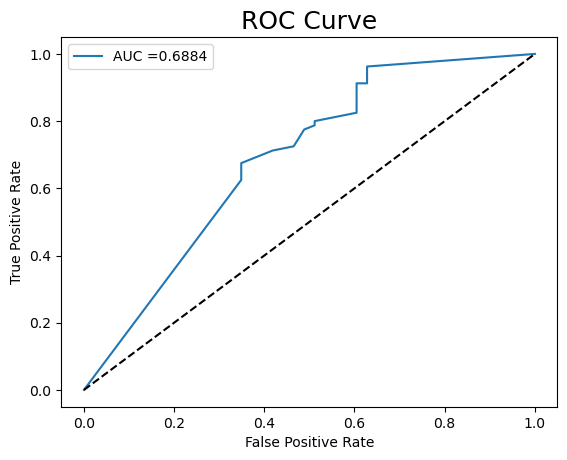

In [91]:
#lets plot the ROC curve bases on the predicted resluts
y_pred_prob=d_tree.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();